### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 27th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

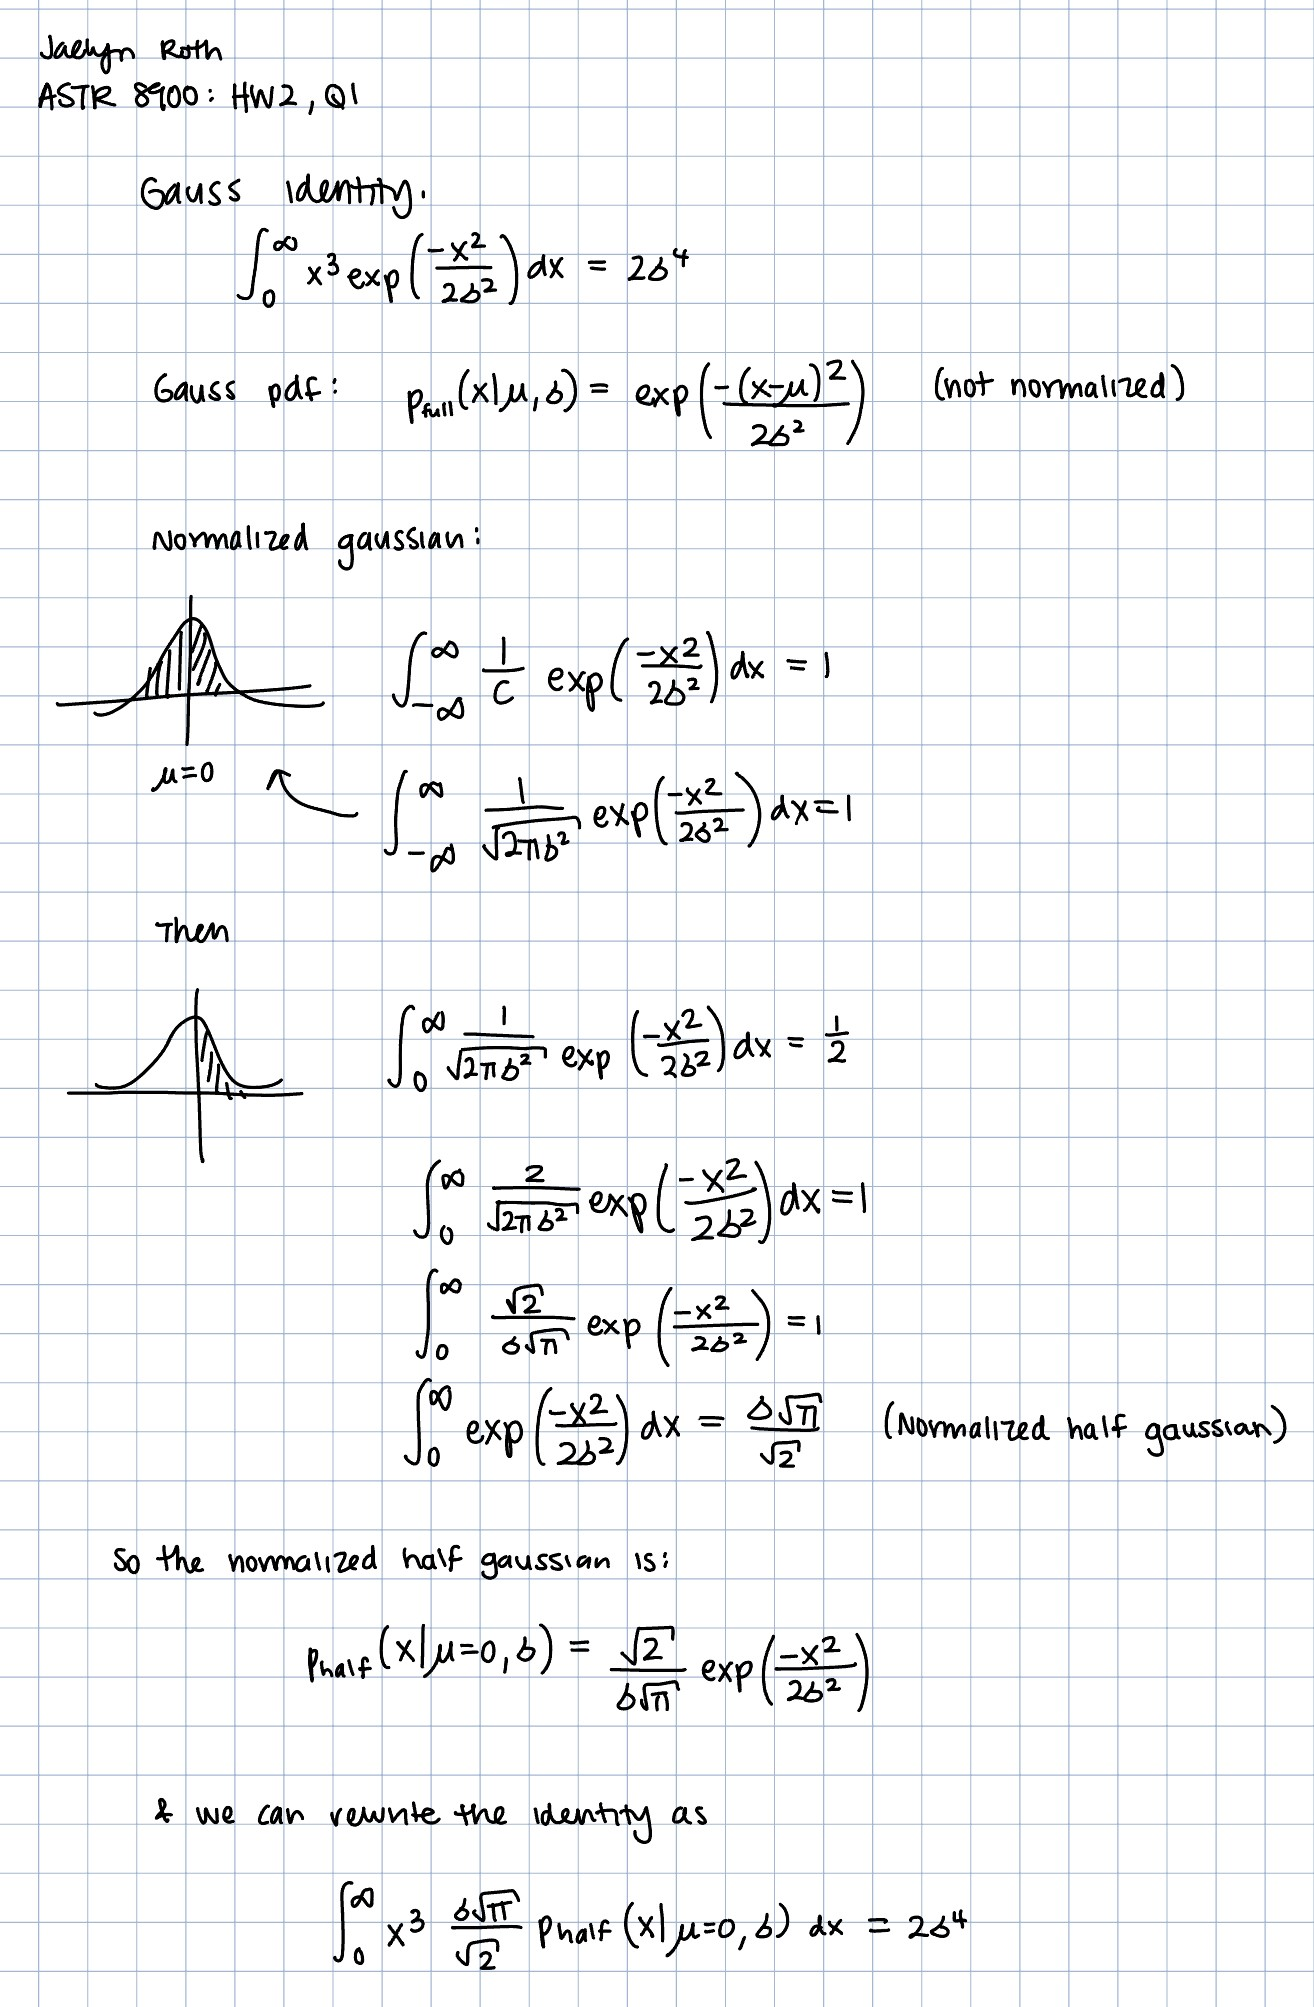


3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=10, usetex=True)

In [5]:
normal = norm(0,3)
normSamples = normal.rvs(int(1e5))

mask = normSamples > 0 # get array of Trues and Falses
normSamples = normSamples[mask] # only accept the Trues

In [11]:
# Monte carlo integration
    # integral(0,inf) of f(x)g(x) --> <g(xi)> where f(x) is the dist the samples are drawn from
    # Here, f(x) is the half gaussian and g(x) is the rest
    # get mean of g(x) as LHS and see if equal to RHS
sigma = 3

lhs = np.mean((normSamples**3)*sigma*np.sqrt(np.pi)/np.sqrt(2))
print("Monte carlo integration:",lhs)

rhs = 2*sigma**4
print('Analytical solution:',rhs)

print('Yay!')


Monte carlo integration: 161.443755923092
Analytical solution: 162
Yay!


<span style="color:red">SRT: Great!</span>

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

In [25]:
Ns = [1e2,1e3,1e4]

monte_results = np.zeros((3,100)) # 3 rows of 100 elements each to store results

for n in range(len(Ns)):
    for i in range(100): # 100 batches of random samples

        samples = normal.rvs(int(Ns[n])) # pull N many samples
        newmask = samples > 0
        samples = samples[newmask] # make it a half gaussian

        monte = np.mean((samples**3)*sigma*np.sqrt(np.pi)/np.sqrt(2))
        monte_results[n][i] = monte # store value in nth row, ith element

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

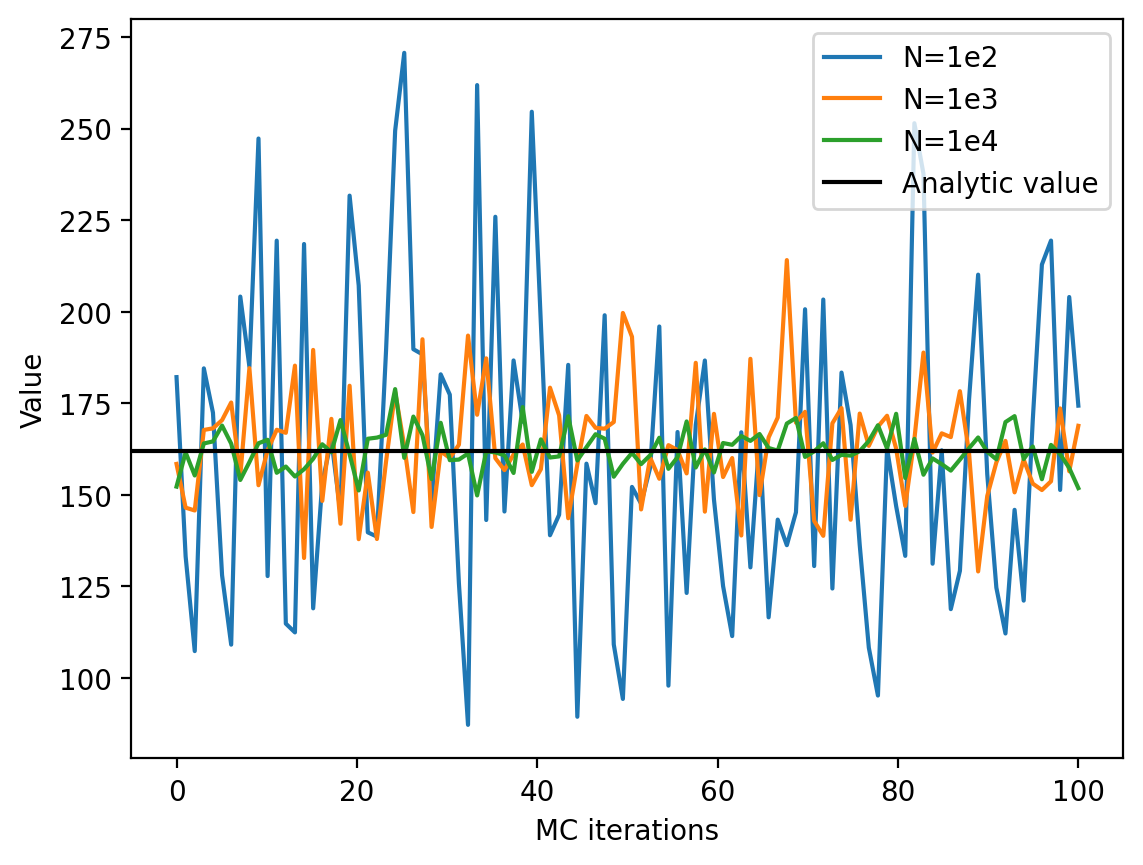

In [55]:
xgrid = np.linspace(0,100,100)

plt.plot(xgrid,monte_results[0],label='N=1e2')
plt.plot(xgrid,monte_results[1],label='N=1e3')
plt.plot(xgrid,monte_results[2],label='N=1e4')
plt.axhline(162,color='black',label='Analytic value')

plt.xlabel('MC iterations')
plt.ylabel('Value')
plt.legend(loc='upper right');

Spread is visualizable but this isn't actually plotting the spread yet. 

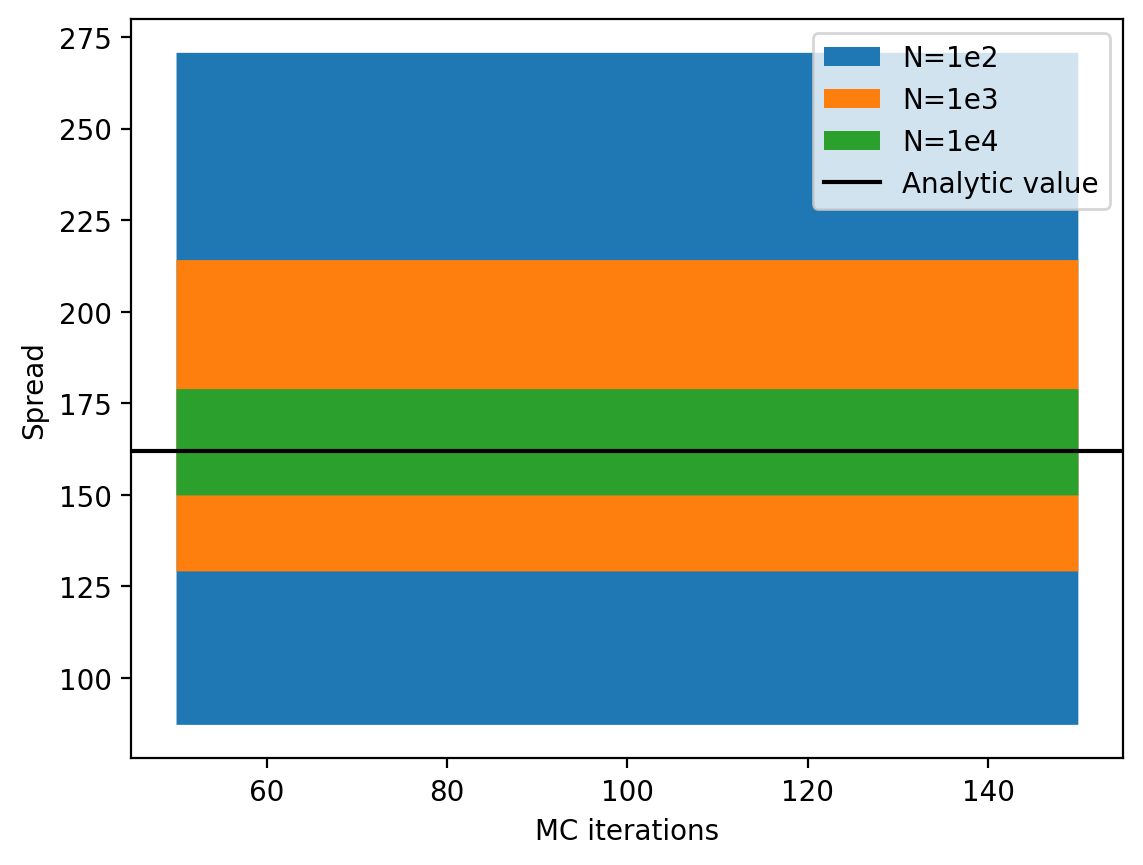

In [130]:
spread1e2 = monte_results[0].max() - monte_results[0].min()
spread1e3 = monte_results[1].max() - monte_results[1].min()
spread1e4 = monte_results[2].max() - monte_results[2].min()


plt.fill_between(xgrid,monte_results[0].max(),monte_results[0].min(),label='N=1e2')
plt.fill_between(xgrid,monte_results[1].max(),monte_results[1].min(),label='N=1e3')
plt.fill_between(xgrid,monte_results[2].max(),monte_results[2].min(),label='N=1e4')
plt.axhline(162, color='black',label='Analytic value')

plt.xlabel('MC iterations')
plt.ylabel('Spread')
plt.legend();

Spread gets smaller and converges near the analytical value as N increases. 

<span style="color:red">SRT: Good, but not quite what the question wanted. The x-axis should have the number of samples per batch, i.e, [100,1000,10000] rather than the number of batches. -2</span>

e.g., 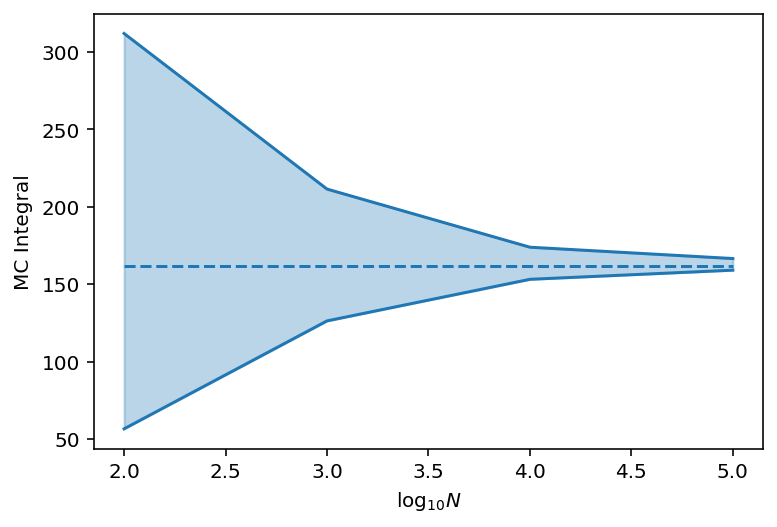

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

10 random draws: [101.86358605  97.53739865 112.30500498  94.88045445 105.58957686
 103.46635066 127.14034286  95.62137835  90.42739604 100.99279073]
PDF(145) = 0.0002954565607958672


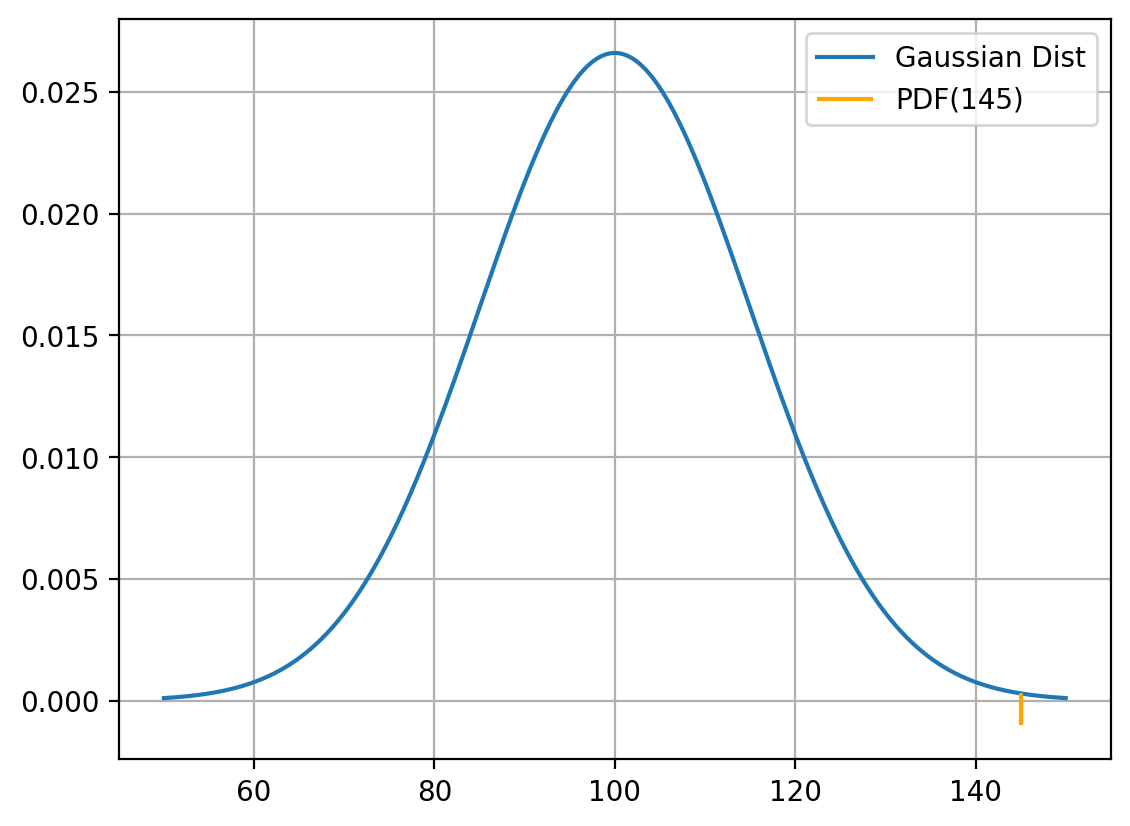

In [58]:
gauss = norm(100,15) # create object
draws = gauss.rvs(10) # pull 10 random draws
print('10 random draws:',draws) # print draws

# Plot distribution and pdf value at x = 145
xvals = np.linspace(50,150,1000)
gaussPDF = gauss.pdf(xgrid)

plt.plot(xvals,gaussPDF,label='Gaussian Dist')

val145 = gauss.pdf(145)
print('PDF(145) =',val145)
plt.vlines(145,-0.001,val145,label='PDF(145)',color='orange')

plt.grid()
plt.legend()

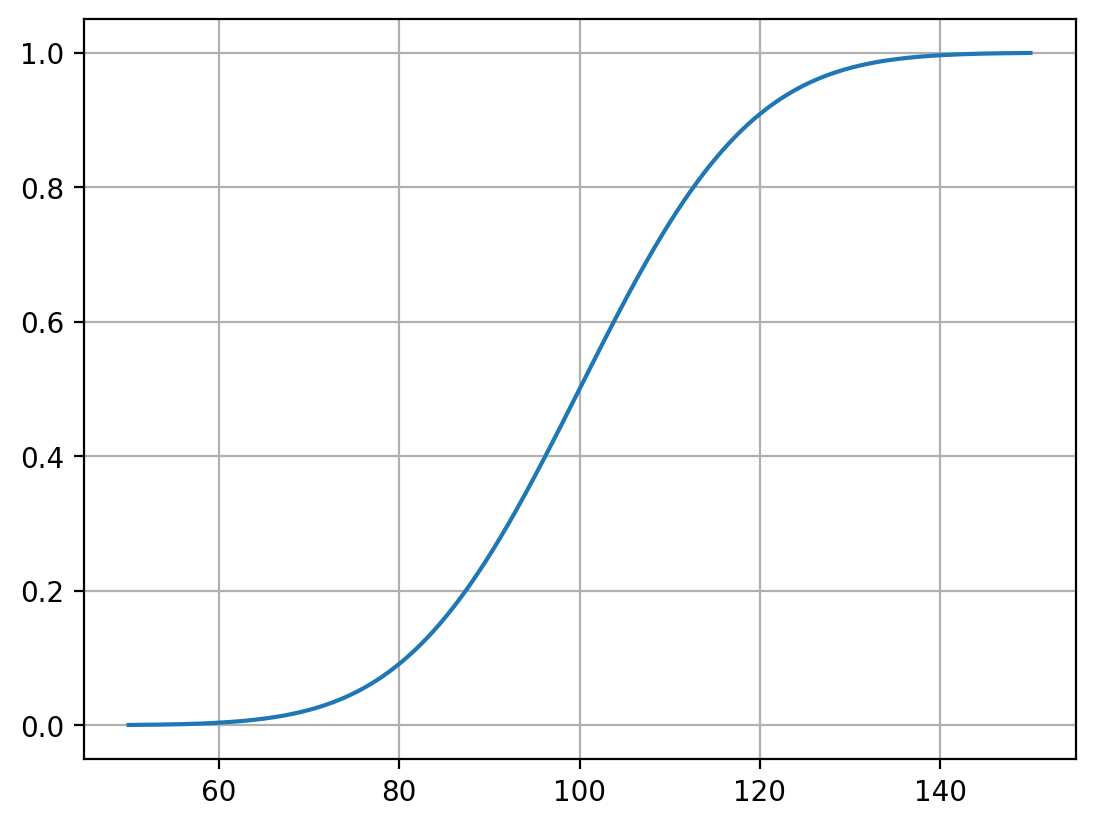

In [62]:
# Get & plot cdf
gaussCDF = gauss.cdf(xgrid)
plt.plot(xvals,gaussCDF)
plt.grid()

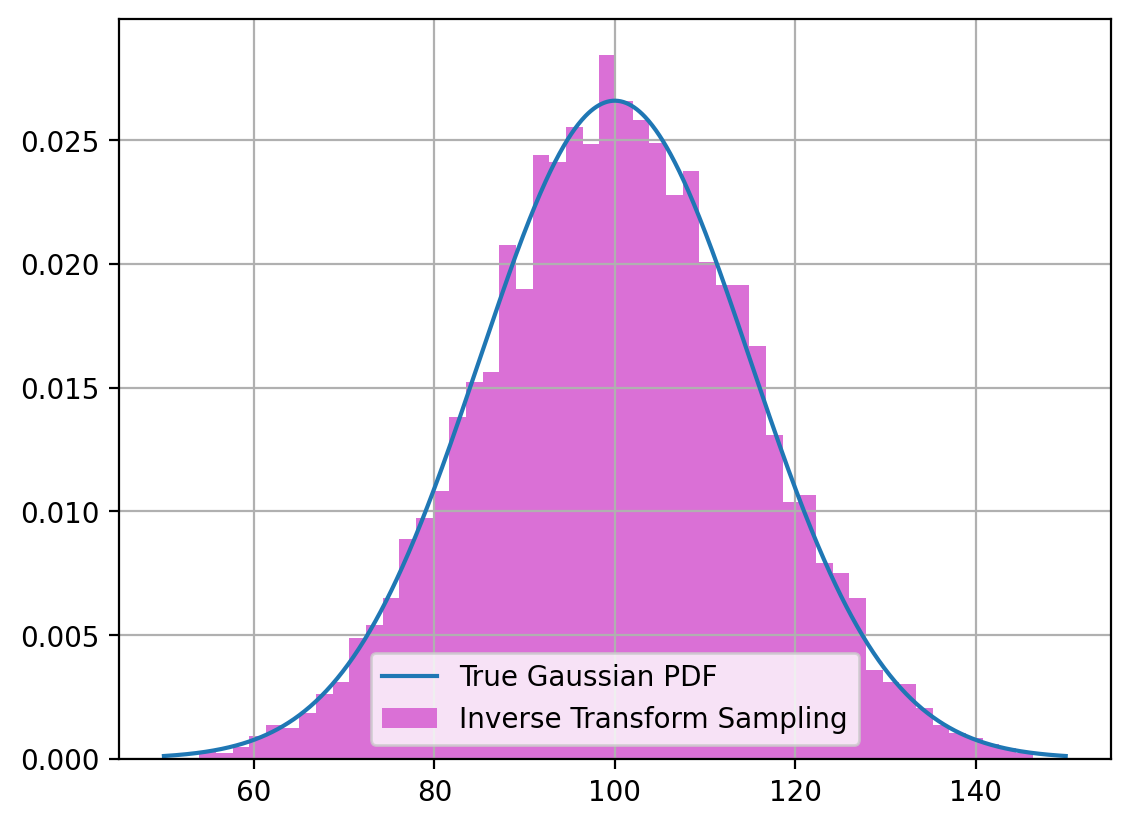

In [63]:
# Create ppf (same as quantile function, need to interpolate cdf)
gaussPPF = scipy.interpolate.interp1d(gaussCDF,xgrid)
    # interp1d(input,output) --> to do an inverse, give "y" values as input

# generate random sample from uniform dist
unif = np.random.uniform(0.001, 0.999, 10000) #10^4 samples of the y axis which goes 0 to 1
gaussMonte = gaussPPF(unif)

plt.plot(xvals,gaussPDF,label='True Gaussian PDF');
plt.hist(gaussMonte,bins=50,density='True',color='orchid',label='Inverse Transform Sampling');
plt.legend()
plt.grid()

<span style="color:red">SRT: The above is great. But you can also access this using the `ppf` attribute of your scipy.stats Gaussian object.</span>


The cumulative distribution function gives the probability that a value is less than or equal to the inputted value, so the probability of an IQ being greater than or equal to 145 would be 1 minus the cdf evaluated at x = 145. 

In [64]:
# dont use gaussCDF that I created because it relies on the entire xgrid
# use gauss.cdf instead
1-gauss.cdf(145)

0.0013498980316301035

<span style="color:red">SRT: Good!</span>


A "one in a million" IQ would have a probability of 10^-6 of happening, so we need to solve for the x value that makes

$$ 1 - cdf(x) = 10^{-6}.$$

The inverse of the cumulative distribution function is the percent distribution function, so

$$ ppf(1-10^{-6}) = x. $$

In [68]:
almost1 = 1-1e-6
gauss.ppf(almost1)

171.3013646322563

<span style="color:red">SRT: Nice. Can also use the inverse survival function.</span>


In [73]:
# Check that number...
print('Prob of getting IQ = 171.3:',gauss.pdf(171.3))
print('Prob of getting IQ > 171.3:',1-gauss.cdf(171.3)) # should be one in a million

Prob of getting IQ = 171.3: 3.300315360724949e-07
Prob of getting IQ > 171.3: 1.000450274291076e-06


<span style="color:red">SRT: Note that the first is not a probability. It's a probability density. The second is cumulative, so is a probability.</span>


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

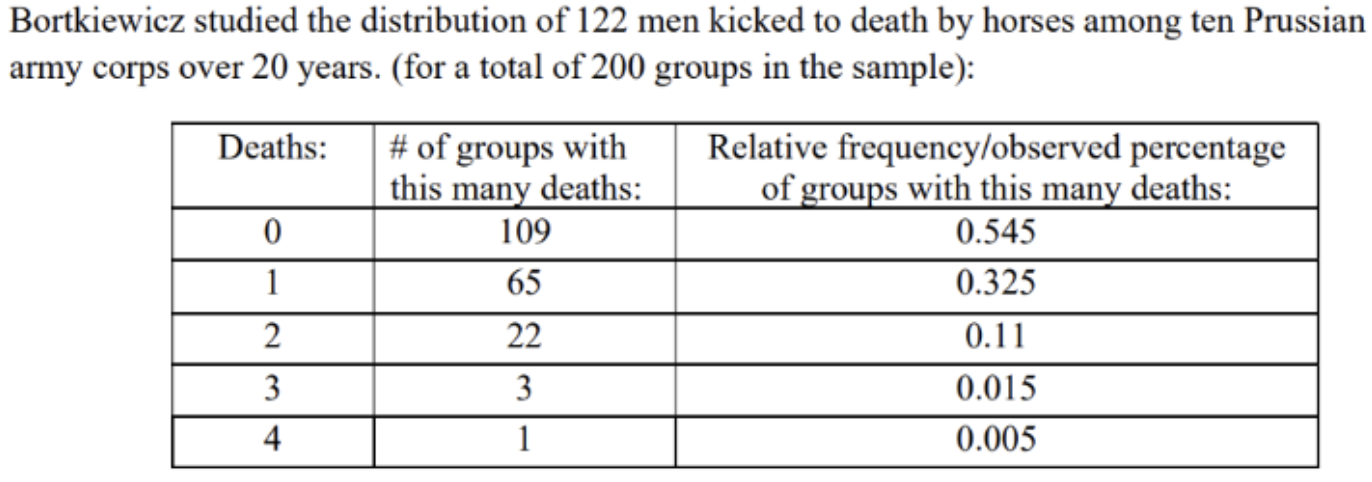

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

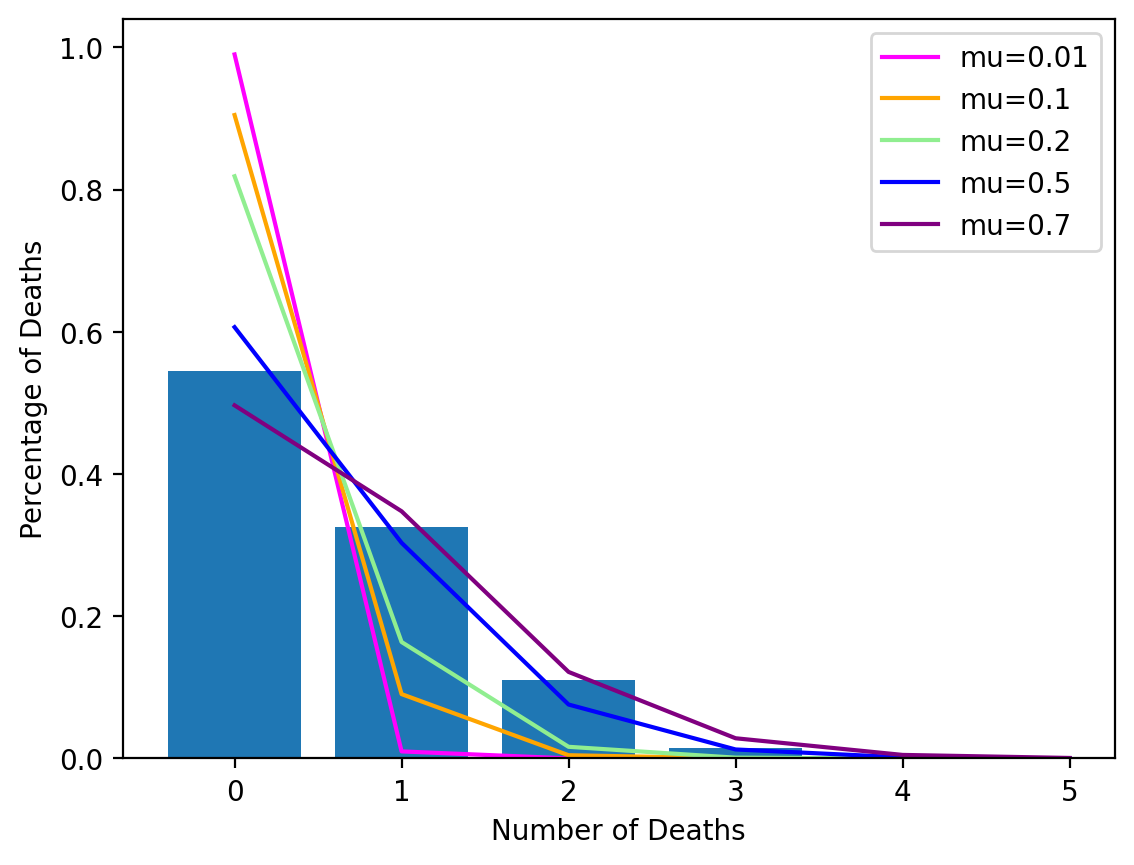

In [137]:
deathNum = [0,1,2,3,4]
deathPercent = [0.545,0.325,0.11,0.015,0.005]
plt.bar(deathNum,deathPercent)
plt.xlabel('Number of Deaths')
plt.ylabel('Percentage of Deaths')

xrange = np.linspace(0,5,6) # 6 data points for 0, 1, 2, ..5 

poiss1 = scipy.stats.poisson(mu=0.01)
poiss2 = scipy.stats.poisson(mu=0.1)
poiss3 = scipy.stats.poisson(mu=0.2)
poiss4 = scipy.stats.poisson(mu=0.5)
poiss5 = scipy.stats.poisson(mu=0.7)

plt.plot(xrange,poiss1.pmf(xrange),color='magenta',label='mu=0.01') # poisson is discrete, so there is no pdf attribute
plt.plot(xrange,poiss2.pmf(xrange),color='orange',label='mu=0.1')
plt.plot(xrange,poiss3.pmf(xrange),color='lightgreen',label='mu=0.2')
plt.plot(xrange,poiss4.pmf(xrange),color='blue',label='mu=0.5')
plt.plot(xrange,poiss5.pmf(xrange),color='purple',label='mu=0.7')

plt.legend();

It looks like $\mu = 0.5$ does the best for now.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

We have to use a weighted mean because our uncertainties are heteroscedastic. From Lecture 5, we have 

$$\hat \mu = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)}.$$

We can exchange $\frac{1}{\sigma_{i}^2}$ for the percentage of occurence because they both act as the weight for the x value. So, we have

$$\hat \mu = \frac{\sum_i^N (x_i * \text{\% of occurence})}{\sum_i^N (\text{\% of occurence})}.$$


In [132]:
deathNum = np.array(deathNum)
deathPercent = np.array(deathPercent)

weightedMu = np.sum(deathNum*deathPercent) / np.sum(deathPercent)
print(weightedMu)

0.6100000000000001


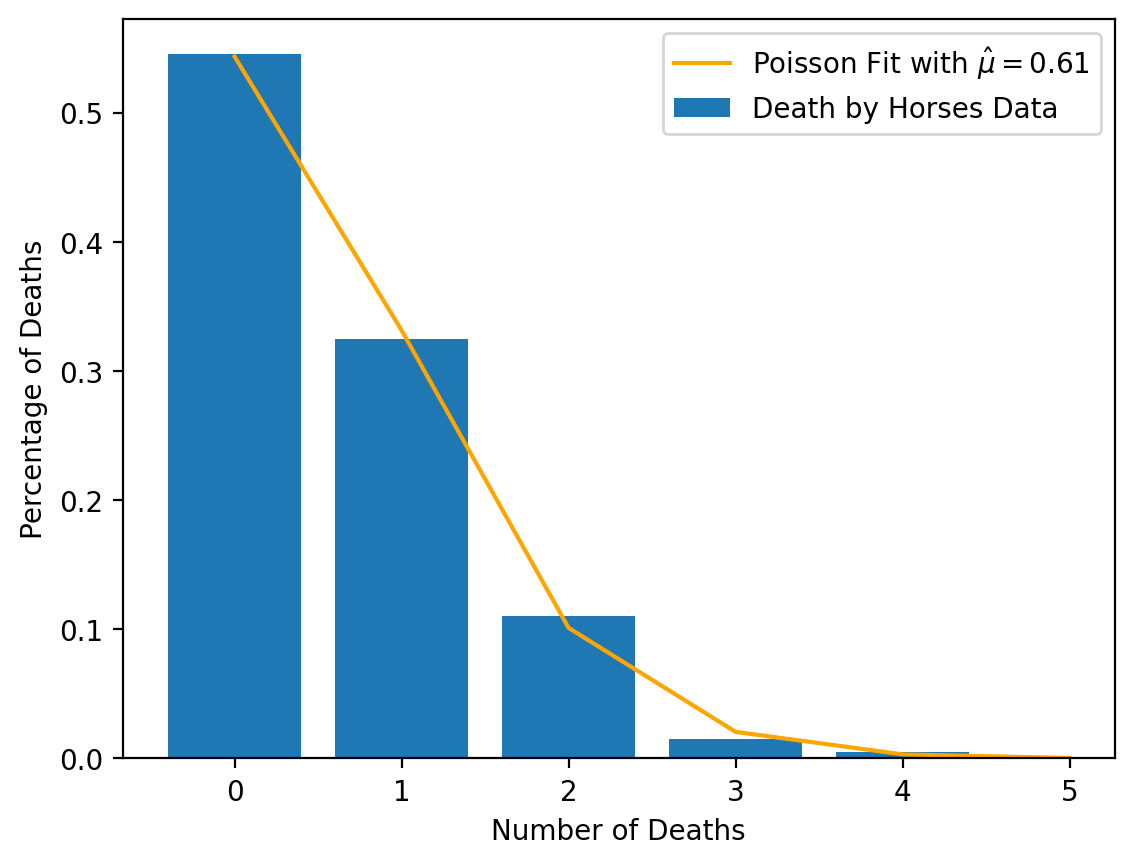

In [149]:
# Plot with weightedMu
plt.bar(deathNum,deathPercent,label='Death by Horses Data')
plt.xlabel('Number of Deaths')
plt.ylabel('Percentage of Deaths')

bestPoiss = scipy.stats.poisson(mu=weightedMu)
plt.plot(xrange,bestPoiss.pmf(xrange),color='orange',label='Poisson Fit with $\hat \mu = 0.61$')
plt.legend();


<span style="color:red">SRT: Awesome</span>
